## title: "Template4JupyterNotebook"
author: "M. Maniscalco"
date: "5/22/2019"
output: html_document


check R version

In [21]:
R.Version()

$platform
[1] "x86_64-apple-darwin15.6.0"

$arch
[1] "x86_64"

$os
[1] "darwin15.6.0"

$system
[1] "x86_64, darwin15.6.0"

$status
[1] ""

$major
[1] "3"

$minor
[1] "6.0"

$year
[1] "2019"

$month
[1] "04"

$day
[1] "26"

$`svn rev`
[1] "76424"

$language
[1] "R"

$version.string
[1] "R version 3.6.0 (2019-04-26)"

$nickname
[1] "Planting of a Tree"

Load the packages

In [43]:
#install.packages("vegan")
library(reshape2)
library(ggplot2)
library(vegan)
library(plyr)
library(data.table)
library(tidyverse)
library(tibble)
library(jcolors)
jcolors('default')
library(RColorBrewer)
library(forcats)

kelly_green rich_electric_blue        maximum_red     majorelle_blue 
         "#29BF12"          "#00A5CF"          "#DE1A1A"          "#574AE2" 
fluorescent_orange 
         "#FFBF00"

First, we will upload the mapping file with all the metadata associated with our samples.

In [44]:
# setwd("/Users/m.maniscalco/Documents/jupyter-notebook-Binder-tutorial")
map_table <- "example-data/mapping-file-w-metadata.txt"
map_table <- read.table(file.path(map_table), sep = "\t", header = TRUE, check.names = FALSE)
head(map_table)

SampleID,NematodeOrder,NematodeFamily,NematodeGenus,NematodeID,NematodeID_combined,FeedingGroup,MorphVoucher,Year,OceanRegion,Habitat,Depth,Latitude,Longitude,SampleSite,DNA_Extraction,PickedBy,phinchID,Description
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<int>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>
16Snem1,unknown,unknown,unknown,Nematoda,Nematoda,unknown,No,2007,GulfofMexico,Seep,1425,27.11997,-91.16508,GC852.16,water+WLB,Holly,16Snem1,Seep.nema
16Snem11,unknown,unknown,unknown,Nematoda,Nematoda,unknown,No,2007,GulfofMexico,Seep,2391,26.38718,-93.51293,AC601.130,water+WLB,Holly,16Snem11,Seep.nema
16Snem100,Monhysterida,Xyalidae,Daptonema,Daptonema,Daptonema,1B,No,2013,BeaufortSea,Arctic,750,70.43350,-138.98340,Gry.06,WLB,Tiago,16Snem100,Arctic.nema
16Snem101,Enoplida,Oncholaimidae,Oncholaimidae,Oncholaimidae,Oncholaimidae,2B,No,2007,GulfofMexico,NotSeep,2222,27.64819,-88.37472,AT340.209,WLB,Tiago,16Snem101,NotSeep.nema
16Snem102,unknown,unknown,unknown,Nematoda,Nematoda,unknown,No,2007,GulfofMexico,NotSeep,2222,27.64819,-88.37472,AT340.209,WLB,Tiago,16Snem102,NotSeep.nema
16Snem103,Chromadorida,Desmoscolecidae,Desmocolex,Desmocolex_sp3,Desmocolex,1A,Yes,2007,GulfofMexico,NotSeep,2222,27.64819,-88.37472,AT340.209,WLB,Tiago,16Snem103,NotSeep.nema


Second, we will upload the count data file.

In [45]:
pthwy <- read.table(file.path("example-data/pathways-count-data.txt"), sep = "\t", header = TRUE, check.names = FALSE)
head(pthwy)

SampleID,1CMET2-PWY,ARGSYN-PWY,ARGSYNBSUB-PWY,P461-PWY,P562-PWY,P621-PWY,PANTO-PWY,PANTOSYN-PWY,PENTOSE-P-PWY,PEPTIDOGLYCANSYN-PWY,PHOSLIPSYN-PWY,POLYAMINSYN3-PWY,POLYAMSYN-PWY,ARO-PWY,POLYISOPRENSYN-PWY,PPGPPMET-PWY,PROTOCATECHUATE-ORTHO-CLEAVAGE-PWY,PRPP-PWY
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
16Snem1,3696.066,3698.833,4119.343,945.7760,1060.0679,122.6210,3615.234,3719.077,3051.592,3883.261,4407.557,744.9406,1357.231,4356.296,4013.101,2790.119,2706.0535,3335.816
16Snem100,2389.906,2606.693,2849.895,146.2190,533.4529,0.0000,2364.327,2493.150,1232.085,2300.700,2788.465,989.8193,1016.388,2925.505,2481.834,1183.673,1452.6002,2151.801
16Snem101,4036.068,4498.352,4474.021,1620.8331,1426.0818,501.7587,4259.340,4373.293,3662.357,4552.112,4815.513,0.0000,2061.028,4498.707,4244.392,3085.995,2908.9342,4374.081
16Snem102,1872.929,2409.799,2517.938,135.2921,294.3585,0.0000,1813.155,1712.666,2469.701,2181.324,2541.692,494.1417,1237.934,2285.327,1858.381,1415.328,976.2567,1666.517
16Snem103,4899.050,4740.174,4657.052,919.3931,199.5137,1020.4024,4882.937,4947.571,4749.767,5082.785,5581.826,1353.0013,1763.406,5415.930,4880.102,3038.892,3633.8818,4577.253
16Snem105,4002.694,3879.560,4431.468,1132.8961,141.9247,0.0000,4339.203,4263.160,1992.154,4041.499,4975.970,870.9131,1202.017,4390.093,3901.927,3176.049,4583.9709,3979.257


 Now, let's wrangle some data, eh?!

In [46]:
merged_obj <- merge(pthwy, map_table)
head(merged_obj)
str(merged_obj)

SampleID,1CMET2-PWY,ARGSYN-PWY,ARGSYNBSUB-PWY,P461-PWY,P562-PWY,P621-PWY,PANTO-PWY,PANTOSYN-PWY,PENTOSE-P-PWY,⋯,OceanRegion,Habitat,Depth,Latitude,Longitude,SampleSite,DNA_Extraction,PickedBy,phinchID,Description
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<fct>,<fct>,<int>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>
16Snem1,3696.066,3698.833,4119.343,945.7760,1060.0679,122.6210,3615.234,3719.077,3051.592,⋯,GulfofMexico,Seep,1425,27.11997,-91.16508,GC852.16,water+WLB,Holly,16Snem1,Seep.nema
16Snem100,2389.906,2606.693,2849.895,146.2190,533.4529,0.0000,2364.327,2493.150,1232.085,⋯,BeaufortSea,Arctic,750,70.43350,-138.98340,Gry.06,WLB,Tiago,16Snem100,Arctic.nema
16Snem101,4036.068,4498.352,4474.021,1620.8331,1426.0818,501.7587,4259.340,4373.293,3662.357,⋯,GulfofMexico,NotSeep,2222,27.64819,-88.37472,AT340.209,WLB,Tiago,16Snem101,NotSeep.nema
16Snem102,1872.929,2409.799,2517.938,135.2921,294.3585,0.0000,1813.155,1712.666,2469.701,⋯,GulfofMexico,NotSeep,2222,27.64819,-88.37472,AT340.209,WLB,Tiago,16Snem102,NotSeep.nema
16Snem103,4899.050,4740.174,4657.052,919.3931,199.5137,1020.4024,4882.937,4947.571,4749.767,⋯,GulfofMexico,NotSeep,2222,27.64819,-88.37472,AT340.209,WLB,Tiago,16Snem103,NotSeep.nema
16Snem105,4002.694,3879.560,4431.468,1132.8961,141.9247,0.0000,4339.203,4263.160,1992.154,⋯,GulfofMexico,NotSeep,2222,27.64819,-88.37472,AT340.209,WLB,Tiago,16Snem105,NotSeep.nema


'data.frame':	13 obs. of  37 variables:
 $ SampleID                          : Factor w/ 13 levels "16Snem1","16Snem100",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ 1CMET2-PWY                        : num  3696 2390 4036 1873 4899 ...
 $ ARGSYN-PWY                        : num  3699 2607 4498 2410 4740 ...
 $ ARGSYNBSUB-PWY                    : num  4119 2850 4474 2518 4657 ...
 $ P461-PWY                          : num  946 146 1621 135 919 ...
 $ P562-PWY                          : num  1060 533 1426 294 200 ...
 $ P621-PWY                          : num  123 0 502 0 1020 ...
 $ PANTO-PWY                         : num  3615 2364 4259 1813 4883 ...
 $ PANTOSYN-PWY                      : num  3719 2493 4373 1713 4948 ...
 $ PENTOSE-P-PWY                     : num  3052 1232 3662 2470 4750 ...
 $ PEPTIDOGLYCANSYN-PWY              : num  3883 2301 4552 2181 5083 ...
 $ PHOSLIPSYN-PWY                    : num  4408 2788 4816 2542 5582 ...
 $ POLYAMINSYN3-PWY                  : num  745 990 0 494 1353

needs comment here

In [47]:
merged_obj_oceanregion <- merged_obj %>%
  group_by(OceanRegion) %>%
  summarise_if(is.numeric, sum, na.rm = TRUE)
head(merged_obj_oceanregion)

OceanRegion,1CMET2-PWY,ARGSYN-PWY,ARGSYNBSUB-PWY,P461-PWY,P562-PWY,P621-PWY,PANTO-PWY,PANTOSYN-PWY,PENTOSE-P-PWY,⋯,POLYAMSYN-PWY,ARO-PWY,POLYISOPRENSYN-PWY,PPGPPMET-PWY,PROTOCATECHUATE-ORTHO-CLEAVAGE-PWY,PRPP-PWY,Year,Depth,Latitude,Longitude
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>
BeaufortSea,2389.906,2606.693,2849.895,146.219,533.4529,0.000,2364.327,2493.15,1232.085,⋯,1016.388,2925.505,2481.834,1183.673,1452.60,2151.801,2013,750,70.4335,-138.9834
GulfofMexico,46583.784,43164.608,45969.392,11163.800,5505.5870,7228.875,43792.924,42888.93,48342.351,⋯,15428.875,50484.830,52943.880,30587.073,39050.58,46385.173,24084,21254,326.8197,-1085.1674


needs comment here

In [48]:
merged_obj_oceanregion_transpose <- merged_obj_oceanregion %>%
  rownames_to_column %>% 
  gather(var, value, -rowname) %>% 
  spread(rowname, value) 
merged_obj_oceanregion_transpose <- merged_obj_oceanregion_transpose[order(match(merged_obj_oceanregion_transpose$var,names(merged_obj_oceanregion))),]
colnames(merged_obj_oceanregion_transpose) <- merged_obj_oceanregion_transpose[1,] 
merged_obj_oceanregion_transpose <- merged_obj_oceanregion_transpose[-1, ]
head(merged_obj_oceanregion_transpose)

Warning message:
“attributes are not identical across measure variables;
they will be dropped”

OceanRegion,BeaufortSea,GulfofMexico
<chr>,<chr>,<chr>
1CMET2-PWY,2389.9064,46583.7836
ARGSYN-PWY,2606.6932,43164.6076
ARGSYNBSUB-PWY,2849.8948,45969.3918
P461-PWY,146.219,11163.7997
P562-PWY,533.4529,5505.587
P621-PWY,0,7228.8754


comment here

In [49]:
sapply(merged_obj_oceanregion_transpose, mode)
merged_obj_oceanregion_transpose[2:3] = data.matrix(merged_obj_oceanregion_transpose[2:3])
str(merged_obj_oceanregion_transpose)

OceanRegion  BeaufortSea GulfofMexico 
 "character"  "character"  "character"

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	22 obs. of  3 variables:
 $ OceanRegion : chr  "1CMET2-PWY" "ARGSYN-PWY" "ARGSYNBSUB-PWY" "P461-PWY" ...
 $ BeaufortSea : num  2390 2607 2850 146 533 ...
 $ GulfofMexico: num  46584 43165 45969 11164 5506 ...


comment here

In [50]:
for(col in names(merged_obj_oceanregion_transpose)[-1]) {
  merged_obj_oceanregion_transpose[paste0(col, "_pct")] = merged_obj_oceanregion_transpose[col] / sum(merged_obj_oceanregion_transpose[col])
}
head(merged_obj_oceanregion_transpose)

OceanRegion,BeaufortSea,GulfofMexico,BeaufortSea_pct,GulfofMexico_pct
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1CMET2-PWY,2389.9064,46583.784,0.069070516,0.066542481
ARGSYN-PWY,2606.6932,43164.608,0.075335856,0.061658368
ARGSYNBSUB-PWY,2849.8948,45969.392,0.082364608,0.065664854
P461-PWY,146.2190,11163.800,0.004225865,0.015946900
P562-PWY,533.4529,5505.587,0.015417285,0.007864441
P621-PWY,0.0000,7228.875,0.000000000,0.010326068


In [51]:
percent_cols <- grep("_pct", colnames(merged_obj_oceanregion_transpose))
col_keep <- c(percent_cols)
merged_obj_oceanregion_transpose_perc <- merged_obj_oceanregion_transpose[, c(1, col_keep)]
head(merged_obj_oceanregion_transpose_perc)

OceanRegion,BeaufortSea_pct,GulfofMexico_pct
<chr>,<dbl>,<dbl>
1CMET2-PWY,0.069070516,0.066542481
ARGSYN-PWY,0.075335856,0.061658368
ARGSYNBSUB-PWY,0.082364608,0.065664854
P461-PWY,0.004225865,0.015946900
P562-PWY,0.015417285,0.007864441
P621-PWY,0.000000000,0.010326068


In [52]:
merged_obj_oceanregion_transpose_perc$total_pthwy_perc <- rowSums(merged_obj_oceanregion_transpose_perc[,-1])
head(merged_obj_oceanregion_transpose_perc)
merged_obj_oceanregion_transpose_perc <- merged_obj_oceanregion_transpose_perc %>% 
  arrange(desc(merged_obj_oceanregion_transpose_perc$total_pthwy_perc))
head(merged_obj_oceanregion_transpose_perc)

OceanRegion,BeaufortSea_pct,GulfofMexico_pct,total_pthwy_perc
<chr>,<dbl>,<dbl>,<dbl>
1CMET2-PWY,0.069070516,0.066542481,0.13561300
ARGSYN-PWY,0.075335856,0.061658368,0.13699422
ARGSYNBSUB-PWY,0.082364608,0.065664854,0.14802946
P461-PWY,0.004225865,0.015946900,0.02017276
P562-PWY,0.015417285,0.007864441,0.02328173
P621-PWY,0.000000000,0.010326068,0.01032607


OceanRegion,BeaufortSea_pct,GulfofMexico_pct,total_pthwy_perc
<chr>,<dbl>,<dbl>,<dbl>
PHOSLIPSYN-PWY,0.08058922,0.08851198,0.1691012
ARO-PWY,0.08454982,0.07211492,0.1566647
ARGSYNBSUB-PWY,0.08236461,0.06566485,0.1480295
POLYISOPRENSYN-PWY,0.07172729,0.07562754,0.1473548
PEPTIDOGLYCANSYN-PWY,0.06649236,0.07862978,0.1451221
ARGSYN-PWY,0.07533586,0.06165837,0.1369942


In [53]:
num_row <- nrow(merged_obj_oceanregion_transpose_perc)
top_10_perc <- ceiling((1)*num_row)
merged_obj_oceanregion_transpose_perc_top_10 <- top_n(merged_obj_oceanregion_transpose_perc, top_10_perc)
merged_obj_oceanregion_transpose_perc_top_10$total_pthwy_perc <- NULL
names(merged_obj_oceanregion_transpose_perc_top_10) <- gsub(x = names(merged_obj_oceanregion_transpose_perc_top_10),
                                                            pattern = "_pct", replacement = "")
head(merged_obj_oceanregion_transpose_perc_top_10)

Selecting by total_pthwy_perc


OceanRegion,BeaufortSea,GulfofMexico
<chr>,<dbl>,<dbl>
PHOSLIPSYN-PWY,0.08058922,0.08851198
ARO-PWY,0.08454982,0.07211492
ARGSYNBSUB-PWY,0.08236461,0.06566485
POLYISOPRENSYN-PWY,0.07172729,0.07562754
PEPTIDOGLYCANSYN-PWY,0.06649236,0.07862978
ARGSYN-PWY,0.07533586,0.06165837


In [54]:
merged_obj_oceanregion_transpose_perc_top_10 <- merged_obj_oceanregion_transpose_perc_top_10 %>%
  rename( "Beaufort Sea" = "BeaufortSea",
    "Gulf of Mexico" = "GulfofMexico")
merged_obj_oceanregion_transpose_perc_top_10.molten <- melt(merged_obj_oceanregion_transpose_perc_top_10, value.name="Count", variable.name="Variable", na.rm=TRUE)

Using OceanRegion as id variables


In [ ]:
Make the plot!

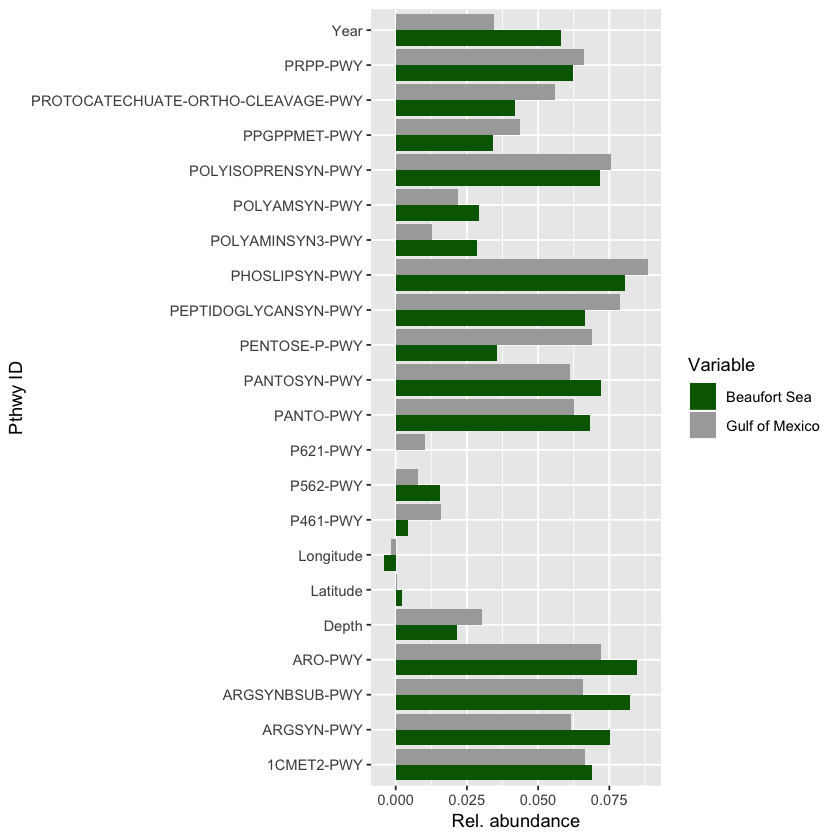

In [55]:
plot <- ggplot(merged_obj_oceanregion_transpose_perc_top_10.molten) +
  geom_col(aes(x = OceanRegion, y = Count, fill = Variable), position = 'dodge') +
  coord_flip() +
  labs(x = "Pthwy ID", y = "Rel. abundance") +
  #scale_fill_manual(values = c(col_vector))
  scale_fill_manual(values = c("darkgreen",
                               "darkgrey"))
plot